# Euler's Method

Given a first order ODE of the form:

$$
\frac{dy}{dx} = y^\prime = f(x, y)
$$

where the value for $y(x = x_0) = y_0$ is known. If we wanted to approximate the solution for $y(x_1) = y_1$ at the point $x_1 = x_0 + h$, we can use the Taylor approximation (expanding around $x_0$):

$$
y_1 = y_0 + y^\prime|_{x_0} h + y^{\prime\prime}|_{x_0} \frac{h^2}{2!} + y^{\prime\prime\prime}|_{x_0} \frac{h^3}{3!} + \dots
$$

For a small value of $h$ ($0 < h < 1$), we can neglect high order powers of $h$ without incurring too much error:

$$
\begin{align*}
y_1 &\approx y_0 + y^\prime h\\
    &\approx y_0 + h f(x_0, y_0)
\end{align*}
$$

Now if we used this approximation to find the next value of $y$ at $x_2 = x_1 + h$ , $y_2$,:

$$
y_2 \approx y_1 + h f(x_1, y_1)
$$

and again for $x_3 = x_2 + h$, $y_3$:

$$
y_3 \approx y_2 + h f(x_2, y_2)
$$

This method can be iterated $n$ times to find:

$$
y_n \approx y_{n-1} + h f(x_{n-1}, y_{n-1})
$$

## Geometric Interpretation

Another way to see the Euler method is as approximating the solution $y(x)$ as a straight line over the interval $[x_n, x_n + h]$, passing through the point $(x_n, y_n)$ with a gradient of $f(x_n, y_n)$ (the tangent of $y$ at that point):

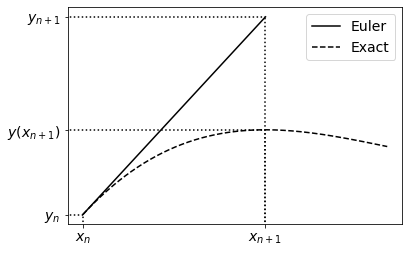

In [4]:
import numpy as np
import matplotlib.pyplot as plt

h = 3
xlims = [0, 5]

###Function
def fprime(a, x, y):
    return 3*a[0]*x*x + 2*a[1]*x + a[2]

def f(a,x):
    return a[0]*x*x*x + a[1]*x*x + a[2]*x + a[3]

def sp_to_cubic(sp_xy):
    """
    Construct a cubic polynomial from the stationary points
    """
    X = np.zeros((4,4))
    Y = np.zeros((4,1))
    
    X[::2,0] = 3*sp_xy[:,0]**2
    X[::2,1] = 2*sp_xy[:,0]
    X[::2,2] = 1
    
    X[1::2,0] = sp_xy[:,0]**3
    X[1::2,1] = sp_xy[:,0]**2
    X[1::2,2] = sp_xy[:,0]
    X[1::2,3] = 1
    
    Y[1::2,0] = sp_xy[:,1]
    
    X = np.matrix(X)
    Y = np.matrix(Y)
    return np.array(X.I*Y).flatten()

##Euler
a = sp_to_cubic(np.array([[3, 10],[7, 5]]))

x_euler = [xlims[0], xlims[0] + h]
y_euler = [f(a, x_euler[0]), 0]

y_euler[1] = y_euler[0] + h*fprime(a, xlims[0], y_euler[0])

x_ticks = [r'$x_n$', r'$x_{n+1}$']
y_ticks = [r'$y_n$', r'$y_{n+1}$', r'$y(x_{n+1})$']
    
##Plot
x = np.linspace(xlims[0], xlims[1], 1000)    

plt.plot(x_euler, y_euler, 'k-', label = 'Euler')
plt.plot(x, f(a,x), 'k--', label = 'Exact')

ylim = plt.ylim()
xlim = plt.xlim()

for i in range(len(x_euler)):
    plt.vlines(x = x_euler[i], ymin = -100, ymax = y_euler[i], color = 'black',
               linestyles = ':')
    plt.hlines(y = y_euler[i], xmin = -100, xmax = x_euler[i], color = 'black',
               linestyles = ':')

plt.vlines(x = x_euler[1], ymin = -100, ymax = f(a, x_euler[1]), color = 'black',
               linestyles = ':')
plt.hlines(y = f(a, x_euler[1]), xmin = -100, xmax = x_euler[1], color = 'black',
               linestyles = ':')

#plt.title(r'$h = {:.0f} (x_n - x_0)$'.format(h), fontsize = 16)
plt.ylim(ylim)
plt.xlim(xlim)
plt.xticks(x_euler, x_ticks, fontsize = 14)
plt.yticks(y_euler + [f(a, x_euler[1])], y_ticks, fontsize = 14)
plt.legend(fontsize = 14)
plt.show()

## Worked Example

Consider the ODE:

$$
\frac{dy}{dx} = y - xy^2
$$

with the given initial conditions: $y = 0.1$ at $x = 0$.

Let's say we want to know the value of $y$ at $x = 10$. We shall **choose** a step size of $h = 0.05$ when integrating this out.

What we need to do is recursively apply Euler steps until we have reached the desired $x$:

In [5]:
x, y = 0, 0.1 #initial conditions

h = 0.05 #step size

x_end = 10 #the value of x for which we want to know y

#The ODE function
def f(x,y):
    return y - x*y*y

#Iterating through the Euler method until x >= x_end:
while x < x_end:
    y = y + h*f(x,y)
    x = x + h #Note, we don't want to update x before it's used in the line above
    
print('y at x = 10 is', y)

y at x = 10 is 0.11102901561046892


Now, it is often important for us to visualize the solution for $y(x)$ over the interval, rather than only finding the value of $y(x = 10)$. We could alter the solution above to append the values to an array (as would be the best solution if we didn't know how many iterations we needed), but instead we will create an array of $x$ values on the interval, as this is known to us before perform the Euler solution:

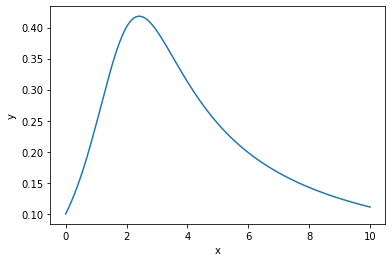

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x0, y0 = 0, 0.1
h = 0.05
x_end = 10

#The ODE function
def f(x,y):
    return y - x*y*y

#Constructing the arrays:
x_arr = np.arange(x0, x_end + h, h) #make sure it goes up to and including x_end

y_arr = np.zeros(x_arr.shape)
y_arr[0] = y0

#Performing the Euler method, note we don't use the last x value in the update calculations
for i,x in enumerate(x_arr[:-1]):
    y_arr[i+1] = y_arr[i] + h*f(x, y_arr[i])

#Plotting the solution
fig, ax = plt.subplots()

ax.plot(x_arr, y_arr)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()